# Laboratorio 05

# One variable equations

Juan Jose Tabares Garcia 

## 1. Circular segment

### 1.1 Equation:

procedure saved in cellphone pictures, to be added later! (25/07)

### 1.2 Plot and Pandas df with plot data:

X axis intercept:  2.37215306122449 radians


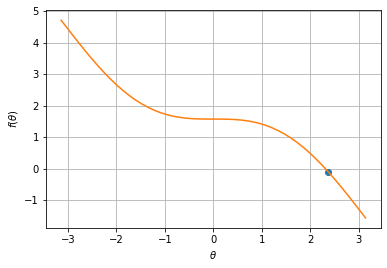

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

xAxis = np.linspace(-3.1415,3.1415)
yAxis = np.zeros(xAxis.size)

def function(theta):
    return np.sin(theta) - theta + np.pi/2

prevValue = 999
i = 0
for theta in xAxis:
    yAxis[i] = (function(theta))
    if prevValue > 0 and function(theta)<0:
        print("X axis intercept: ",(theta), "radians")
        plt.plot(theta,function(theta),marker="o")
    prevValue = function(theta)
    i+=1

plt.plot(xAxis,yAxis);
plt.xlabel("$\\theta$")
plt.ylabel("$f (\\theta)$")
plt.grid();

In [24]:
df = pd.DataFrame(np.array([xAxis,yAxis]).T, columns=["theta","f(theta)"])
df

,theta,f(theta)
0,-3.141500,4.712204
1,-3.013276,4.456107
2,-2.885051,4.202110
3,-2.756827,3.952280
4,-2.628602,3.708613
5,-2.500378,3.473004
6,-2.372153,3.247217
7,-2.243929,3.032852
8,-2.115704,2.831325
9,-1.987480,2.643840


#### Bisection method with scipy.optimize

In [25]:
import scipy.optimize as scop

fzero = scop.bisect(function,-3,3)
print(fzero)

2.3098814600093647


#### fixed point method with scipy.optimize

In [26]:
#We define a "g" function to pass our x parameter
gFunction = lambda x: x-function(x)


scop.fixed_point(gFunction,0)

array(2.30988146)

#### Secant method

In [42]:
#Let's remember that, for the newton-rapson method we must make a guess of where the 0 is located (x0).
#We'll calculate the optimization for various (x0)


for i in range(-3,4):
    print("X0 = ",i,"Optimize result = ",scop.newton(function,i))

X0 =  -3 Optimize result =  2.309881460010057
X0 =  -2 Optimize result =  2.309881460010073
X0 =  -1 Optimize result =  2.3098814600100566
X0 =  0 Optimize result =  2.309881460010057
X0 =  1 Optimize result =  2.3098814600100575
X0 =  2 Optimize result =  2.309881460010033
X0 =  3 Optimize result =  2.309881460010057


#### Newton - Rapson method

Let's remember that scipy.optimize.newton also does the secant method if we pass the derivative of the function, So we must derivate our function:

$ f(\theta) = \sin{(\theta)} - \theta + \frac{\pi}{2}$

We will have that:

$ f'(\theta) = \cos{(\theta)} - 1$

Therefore:

In [43]:
def primedFunction(x):
    return np.cos(x) - 1

#And so we can use optimize.newton with this primedFunction

for i in range(-3,0):
    print("X0 = ",i,"Optimize result = ",scop.newton(function,i,fprime=primedFunction))

X0 =  -3 Optimize result =  2.3098814600100575
X0 =  -2 Optimize result =  2.3098814600100575
X0 =  -1 Optimize result =  2.3098814600100575


## 3. Magnetization and temperature

we have that our function of magnetization in function is defined by:

$ m(T) = \tanh{(\frac{m(T)}{T})}$

We can, however redefine this function as a new function (f) in terms of magnetization and Temperature

$ f(m,t) = \tanh{(\frac{m}{T})} - m $